##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

In [2]:
# import cv2
# import numpy as np

# # Load the image
# image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# # Apply Gaussian blur to the image
# blurred = cv2.GaussianBlur(image, (5, 5), 0)

# # Perform edge detection
# edges = cv2.Canny(blurred, 50, 150)

# # Perform a dilation and erosion to close gaps in between object edges
# dilated = cv2.dilate(edges, None, iterations=2)
# eroded = cv2.erode(dilated, None, iterations=1)

# # Find contours in the eroded image
# contours, hierarchy = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter contours based on the area. This value might need to be adjusted.
# filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# # Draw the contours on the original image
# cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 3)

# # Save the image with drawn contours
# cv2.imwrite('contours.jpg', image)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('dataset/straight/1.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load image")
else:
    height, width = image.shape[:2]
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')

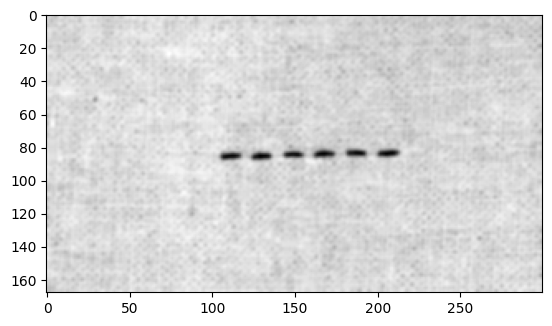

In [ ]:
# Apply Gaussian blur to the image
image = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(image, cmap='gray')

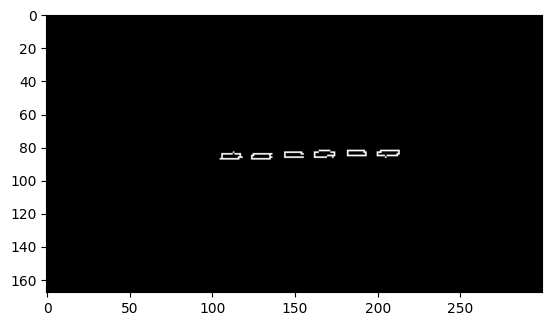

In [ ]:
# Perform edge detection
image = cv2.Canny(image, 50, 150)

plt.imshow(image, cmap='gray')

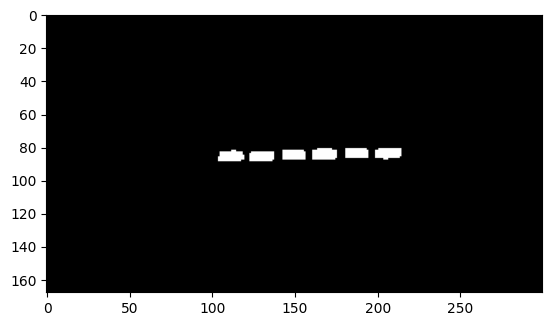

In [ ]:
# Perform a dilation and erosion to close gaps in between object edges
image = cv2.dilate(image, None, iterations=2)
image = cv2.erode(image, None, iterations=1)

plt.imshow(image, cmap='gray')

In [ ]:
# # Make The Same Thing But With Image In Folder dataset
# from imutils import paths
# import imutils, os, cv2, pickle
# from transformers import AutoImageProcessor, RegNetForImageClassification
# imagePaths = list(paths.list_images("dataset"))

# # Initialize the total number of faces processed
# total = 0

# # Loop over the image paths
# for (i, imagePath) in enumerate(imagePaths):
#     print("[INFO] processing image {} / {}".format(i + 1, len(imagePaths)))
#     # Extract the Image Inside The Folder
#     name = imagePath.split(os.path.sep)[-2]
#     image_name = imagePath.split(os.path.sep)[-1]

#     # Load The Image
#     image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    
#     # Augment With Canny
#     image = cv2.Canny(image, 50, 150)

#     # Perform a dilation and erosion to close gaps in between object edges
#     image = cv2.dilate(image, None, iterations=2)
#     image = cv2.erode(image, None, iterations=1)

#     # Create directory if it doesn't exist
#     os.makedirs(f"dataset\\{name}", exist_ok=True)

#     # Save The Image
#     cv2.imwrite(f"dataset\\{name}\\{image_name}", image)

#     # print the label of the image that get from directory with matplotlib
#     plt.title(name)
#     # Show the image result
#     plt.imshow(image)

#     # Update The Total Number Of Faces Processed
#     total += 1

In [ ]:
# # Find contours in the eroded image
# contours, hierarchy = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter contours based on the area. This value might need to be adjusted.
# filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# # Draw the contours on the original image
# image = cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 3)

# plt.imshow(image)

In [ ]:
# # Create a hough line transform object
# lines = cv2.HoughLines(image, 1, np.pi/180, 100)
# print(f'Number of lines detected: {len(lines)}')
# lines = lines.tolist()
# lines = lines[0]

In [ ]:
# print(lines)

In [ ]:
# for rho,theta in lines:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)

# cv2.imshow('Hough Line Transform', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
from imutils import paths
import imutils, os, cv2, pickle
import numpy as np

imagePaths = list(paths.list_images("dataset"))

# Initialize the list of extracted face embeddings and
# corresponding names
knownEmbeddings = []
knownNames = []

# Initialize the total number of faces processed
total = 0

# Loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    print("[INFO] processing image {} / {}".format(i + 1, len(imagePaths)))
    name = imagePath.split(os.path.sep)[-2]

    # Load The Image And Automatilcally Resize To 600:600
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=600)
    (h, w) = image.shape[:2]

    # Implement Detector To Automatically Crop Image To The Pattern We Want

    # Apply Embedding Model To Convert Image To 1D Vector ()

    total += 1

# Dump the face embeddings + names to disk
data = {"embeddings": knownEmbeddings, "names": knownNames}
f = open("output/embeddings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] processing image 1 / 77
[INFO] processing image 2 / 77
[INFO] processing image 3 / 77
[INFO] processing image 4 / 77
[INFO] processing image 5 / 77
[INFO] processing image 6 / 77
[INFO] processing image 7 / 77
[INFO] processing image 8 / 77
[INFO] processing image 9 / 77
[INFO] processing image 10 / 77
[INFO] processing image 11 / 77
[INFO] processing image 12 / 77
[INFO] processing image 13 / 77
[INFO] processing image 14 / 77
[INFO] processing image 15 / 77
[INFO] processing image 16 / 77
[INFO] processing image 17 / 77
[INFO] processing image 18 / 77
[INFO] processing image 19 / 77
[INFO] processing image 20 / 77
[INFO] processing image 21 / 77
[INFO] processing image 22 / 77
[INFO] processing image 23 / 77
[INFO] processing image 24 / 77
[INFO] processing image 25 / 77
[INFO] processing image 26 / 77
[INFO] processing image 27 / 77
[INFO] processing image 28 / 77
[INFO] processing image 29 / 77
[INFO] processing image 30 / 77
[INFO] processing image 31 / 77
[INFO] processing

FileNotFoundError: [Errno 2] No such file or directory: 'output/embeddings.pickle'